# Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
pd.options.display.max_rows = 500

**authors_df**
~~~
Author ID- id автора
Name - назва автора
MEIBI - матрика ідентифікації впливу блогера
MEIBIX- метрика для визначення якості блогу щодо кількості та часу посилань на
коментарі
Average Number Of Words In Posts - середня кількість слів у постах
Average Number Of Words In Posts (without stopwords) - середня кількість слів у постах
без шумових слів
~~~

**posts_df**
~~~
Post ID - id поста
Title - заголовок
Blogger's Name - ім’я блорега
Blogger's ID - id блогера
Number of comments - кількість коментарів
Date - дата створення поста
Number of retrieved inlinks - Кількість отриманих посилань
Number of retrieved comments - Кількість отриманих коментарів
~~~

**Задача:**
- виділити групи блогерів так, щоб ці групи якомога більше відрізнялися між
собою.
- описати створені групи блогерів (чому групи розділились і як це можна
використати)

In [2]:
authors_df = pd.read_csv('autors.csv')
authors_df.head()

,Author ID,Name,MEIBI,MEIBIX,Average Number of Words in posts,Average Number of Words in posts (without stopwords)
0,1,Jason Kincaid,43,43,4.257910,5.858018
1,2,Michael Arrington,114,114,4.136101,5.645050
2,3,Erick Schonfeld,56,57,4.114451,5.660201
3,4,John Biggs,22,22,3.872279,5.293720
4,5,MG Siegler,66,65,3.923442,5.509575


In [3]:
posts_df = pd.read_csv('posts.csv')
posts_df.head()

,Post ID,Title,Blogger's Name,Blogger's ID,Number of comments,Date,Number of retrieved inlinks,Number of retrieved comments
0,1,We Just Tested Twitter&#8217;s @anywhere Platf...,Jason Kincaid,1,14,2010-04-01,0,14
1,2,Facebook To Launch &#8216;Relationships&#8217;...,Jason Kincaid,1,30,2010-04-01,0,30
2,3,NYTimes Request Correction/Removal Of Our Post...,Michael Arrington,2,38,2010-04-01,4,38
3,4,Google Shows How HTML5 Can Run Quake In The Br...,Erick Schonfeld,3,26,2010-04-01,10,26
4,5,The iPad: Apple&#8217;s Trojan Horse,John Biggs,4,49,2010-04-01,1,49


# Basic EDA

In [4]:
merged_df = authors_df.merge(posts_df, how='left',left_on="Author ID",right_on="Blogger's ID")\
    .drop(["Name","Blogger's Name","Blogger's ID", "Post ID","Date"], axis=1)

In [5]:
merged_df.head()

,Author ID,MEIBI,MEIBIX,Average Number of Words in posts,Average Number of Words in posts (without stopwords),Title,Number of comments,Number of retrieved inlinks,Number of retrieved comments
0,1,43,43,4.25791,5.858018,We Just Tested Twitter&#8217;s @anywhere Platf...,14,0,14
1,1,43,43,4.25791,5.858018,Facebook To Launch &#8216;Relationships&#8217;...,30,0,30
2,1,43,43,4.25791,5.858018,"Blippy Does An End Run, Harnesses Gmail OAuth ...",13,1,13
3,1,43,43,4.25791,5.858018,Behind The Scenes Of YouTube&#8217;s ASCII Prank,8,2,8
4,1,43,43,4.25791,5.858018,RethinkDB Raises $1.2 Million For Its Database...,3,0,3


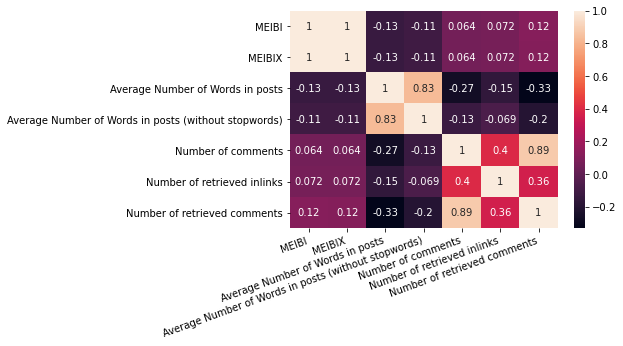

In [6]:
# basic feature correlation in the merged df. 
ax = sns.heatmap(merged_df.drop('Title',axis=1).groupby('Author ID').mean().corr(), annot=True,)

for label in ax.get_xmajorticklabels():
    label.set_rotation(20)
    label.set_horizontalalignment("right")


In [7]:
authors_df[['MEIBI','MEIBIX']].apply(lambda x: x[0]-x[1],axis=1)

0      0
1      0
2     -1
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
dtype: int64

Since the difference is minimal (2 values differ), I select the **MEIBIX** as a potentially more comprehensive index, while leaving **MEIBI** out.


The situation with the fields **Number of comments** and **Number of retrieved comments**, but these can be directed at two sides, i.e. incoming and outcoming comments, thus I keep them both.

Also, the same concerns **Average Number of Words in posts** and **Average Number of Words in posts (without stopwords)**. To decide which one to keep let's see the values distribution.

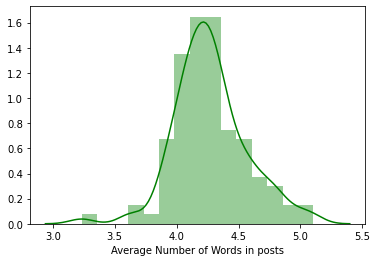

In [8]:
sns.distplot(authors_df['Average Number of Words in posts'], kde=True, color='g');



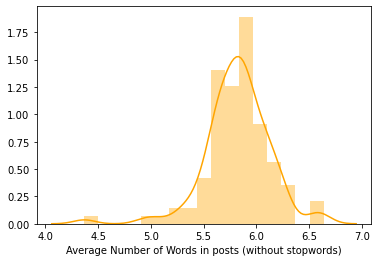

In [9]:
sns.distplot(authors_df['Average Number of Words in posts (without stopwords)'], kde=True, color='orange');

A tricky choice: for the purposes of machine learning the **Average Number of Words in posts (without stopwords)** might be more of higher priority, yet the initial distribution of the **Average Number of Words in posts** is more closely related to normal distribution. Let's try to apply BoxCox transform and see how it goes.

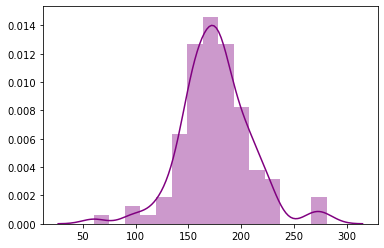

In [10]:
from scipy.stats import boxcox

sns.distplot(boxcox(authors_df['Average Number of Words in posts (without stopwords)'].values)[0], kde=True, color='purple');

Success! So we keep **Average Number of Words in posts (without stopwords)** in a transfromed form. Just that to not forget to convert it back when looking at the interpretation of results. 

Let's quickly see how the remaining features are distributed...

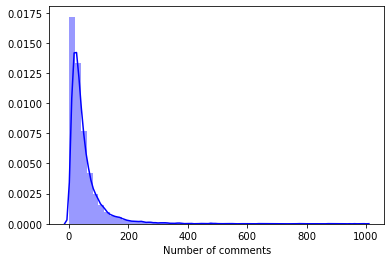

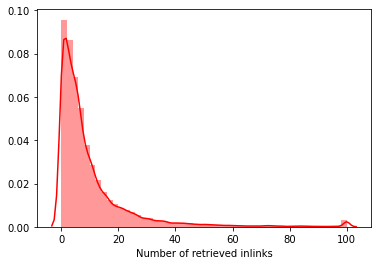

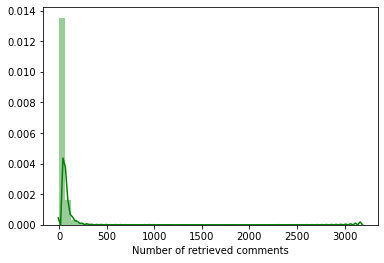

In [11]:
for col, color in zip(['Number of comments', 'Number of retrieved inlinks','Number of retrieved comments'],
                      ['b','r','g']):
    sns.distplot(merged_df[col], kde=True, color=color)
    plt.show();

All are very skewed! The majority of comments lie between 50 and 100, wile inlinks are in range between 10 and 20.
BoxCox takes positive numbers only, thus we could try log transformation:)

Number of comments


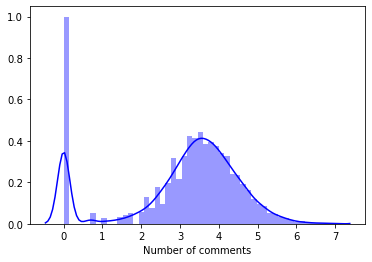

Number of retrieved inlinks


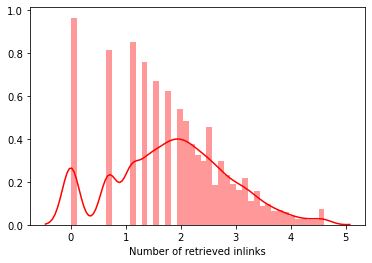

Number of retrieved comments


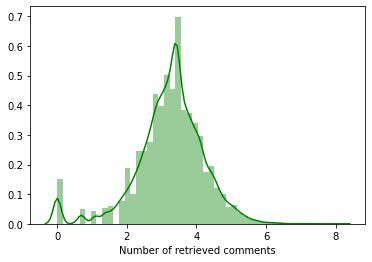

In [12]:
for col, color in zip(['Number of comments', 'Number of retrieved inlinks','Number of retrieved comments'],
                      ['b','r','g']):
    print(col)
    
    sns.distplot(merged_df[col].apply(np.log1p), kde=True, color=color)
    plt.show();

Good enough.


In [13]:
merged_df_trans = merged_df.copy()
box_val, box_lam = boxcox(merged_df_trans['Average Number of Words in posts (without stopwords)'].values)
merged_df_trans['Average Number of Words in posts (without stopwords)'] = box_val
merged_df_trans = merged_df_trans.drop(['MEIBI', 'Average Number of Words in posts'],axis=1)


In [14]:

for col in ['Number of comments', 'Number of retrieved inlinks','Number of retrieved comments']:
    merged_df_trans[col] = merged_df_trans[col].apply(np.log1p)


In [15]:
authors_df.shape, posts_df.shape, merged_df_trans.shape

((107, 6), (19464, 8), (19464, 7))


**The whole task will be divided into two parts: firstly we'll look into the numeric clustering without involving the semantic context of the articles posted, while in the next stage - we'll exactly do that. After each subsection there'll be preliminary conclusions, and after Part 2 - also the overall feedback and insights drawn.**


# Part I - Simple clustering w/o semantic content

## Clustering with focus on the authors

### TSNE

Dimensionality reduction to illustrate clusters

In [16]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import preprocessing
from sklearn import metrics
from numpy import arccos, array, dot, pi, cross
from numpy.linalg import det, norm
from sklearn.svm import OneClassSVM
import seaborn as sns

se = preprocessing.StandardScaler()



In [17]:
from sklearn.manifold import TSNE
print('Building TSNE')

# group by author-id to consider the unique bloggers ids only while retaining some meaningful information from the posts_df
cluster_df_a = merged_df_trans.drop(['Title'],axis=1).groupby('Author ID').mean()

X_scale_a = pd.DataFrame(se.fit_transform(cluster_df_a), columns = cluster_df_a.columns)
X_scale_a.index = cluster_df_a.index


tsne_tables_a = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results_a = tsne_tables_a.fit_transform(X_scale_a.values)

Building TSNE
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 107 samples in 0.000s...
[t-SNE] Computed neighbors for 107 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 107 / 107
[t-SNE] Mean sigma: 1.191082
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.769001
[t-SNE] KL divergence after 800 iterations: 0.222939


In [18]:
df_tsne_a = pd.DataFrame()
df_tsne_a['x'] = tsne_results_a[:, 0]
df_tsne_a['y'] = tsne_results_a[:, 1]

### Clustering

In [19]:
def distance_numpy(A, B, P):
    """ segment line AB, point P, where each one is an array([x, y]) """
    if all(A == P) or all(B == P):
        return 0
    if arccos(dot((P - A) / norm(P - A), (B - A) / norm(B - A))) > pi / 2:
        return norm(P - A)
    if arccos(dot((P - B) / norm(P - B), (A - B) / norm(A - B))) > pi / 2:
        return norm(P - B)
    return norm(cross(A-B, A-P))/norm(B-A)

In [20]:
def get_number_clusters(data,
                        plot_results=True,
                        max_number=10):

    # calculate with different number of clusters
    print('Fitting KMeans')
    Sum_of_squared_distances = []
    K = range(1, max_number + 1)
    for k in (range(max_number)):
        km = KMeans(n_clusters=k + 1, random_state=0)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    # calculate distanse
    p1 = np.array([1, Sum_of_squared_distances[0]])
    p2 = np.array([max_number, Sum_of_squared_distances[-1]])

    distances = []
    for i in range(0, max_number):
        p = np.array([i + 1, Sum_of_squared_distances[i]])
        distances.append(np.linalg.norm(
            np.cross(p2-p1, p1-p))/np.linalg.norm(p2-p1))

    number_clusters = np.argmax(distances) + 1

    if plot_results:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
        ax1.plot(K, Sum_of_squared_distances, 'bx-')
        ax1.set_xlabel('k')
        ax1.set_ylabel('Sum_of_squared_distances')
        ax1.set_title('Elbow Method For Optimal k')

        ax2.plot(K, distances, 'bx-')
        ax2.set_xlabel('k')
        ax2.set_ylabel('Distances')
        ax2.set_title('Distances to Line')

        plt.show()

    return number_clusters

In [21]:
from sklearn.cluster import k_means_, k_means
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances


def get_clusters(data,
                 data_tsne,
                 plot_results=True,
                 max_number=10,
                 column_label_name='label',
                 cluster_type='kmeans',
                 number_clusters=0,
                 normalize=False, 
                
                 ):

    clust_result = data.dropna()
    
    if normalize:
    
        se = preprocessing.StandardScaler()
        X = se.fit_transform(clust_result)
    else:
        X = clust_result

    # get the best number of clusters
    if (cluster_type == 'kmeans') & (number_clusters <= 0):
        number_clusters = get_number_clusters(
            data=X, plot_results=plot_results, max_number=max_number)


    if cluster_type == 'kmeans':

        km = KMeans(n_clusters=number_clusters, random_state=0)
        km = km.fit(X)
        clust_result[column_label_name] = km.labels_

    elif cluster_type == 'dbscan':
        
        db = DBSCAN(eps=0.5, min_samples=10).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        clust_result[column_label_name] = db.labels_

    clust_result['x'] = data_tsne['x']
    clust_result['y'] = data_tsne['y']
    

    return clust_result

/Users/apall/opt/anaconda3/envs/open-mmlab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


Fitting KMeans


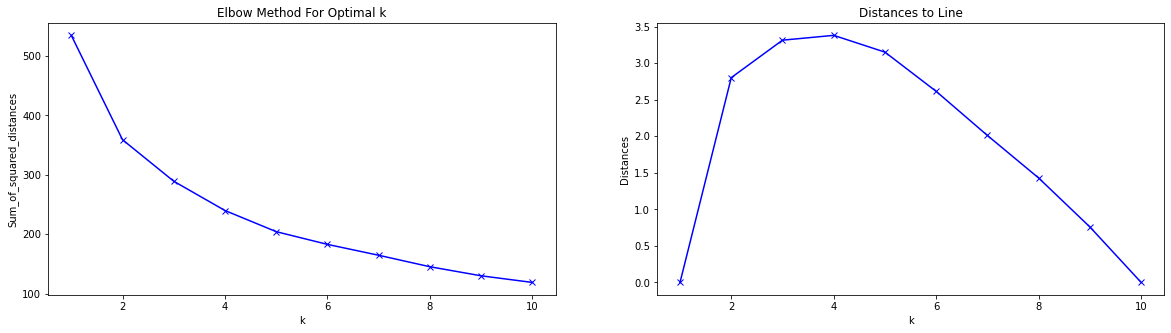

In [22]:
# get clustering based on the optimal number of cluster based on the Elbow and Distance to line methods
cluster_df_a_c = get_clusters(pd.DataFrame(X_scale_a),
                 df_tsne_a, cluster_type='kmeans',)

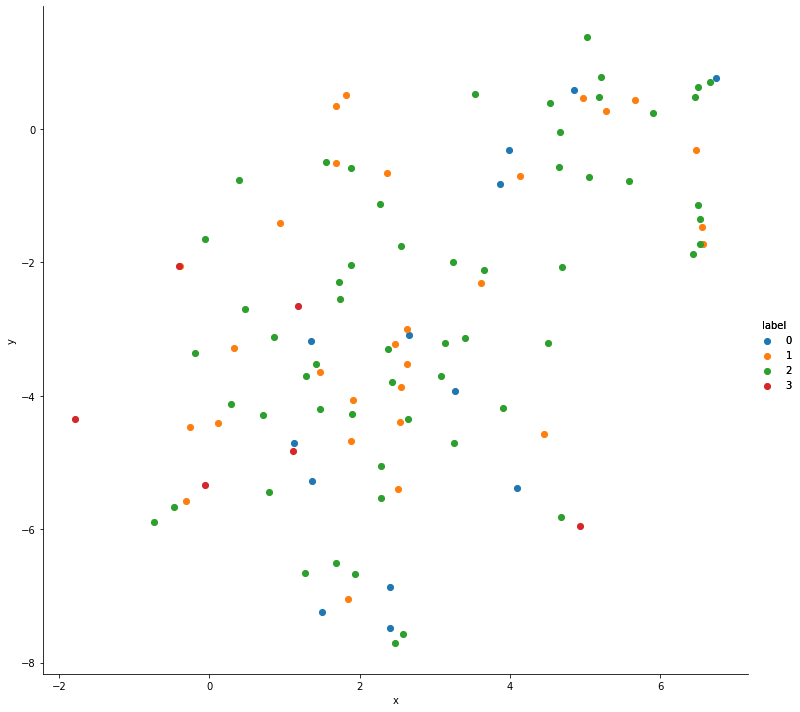

In [23]:
# illustarte clusters with TSNE representation
facet_a = sns.lmplot(data=cluster_df_a_c, x='x', y='y', hue='label',
                           fit_reg=False, legend=True, height=10, scatter_kws={'alpha': 0.3})

g_a = (facet_a.map(plt.scatter, 'x', 'y')
     .add_legend())

plt.show()

**Comment**

In overall, we cannot see a clear differentiation of the clusters in the 2-D TSNE space. While keeping in mind that reduction dimension may not accurately represent the multi-dimensional space points, it still gives some intuition as to how the points are located in the space.

In [24]:
cluster_df_a_c.shape

(107, 8)

In [25]:
cluster_df_a['cluster_label_aut'] = cluster_df_a_c['label']
cluster_df_a.head()

,MEIBIX,Average Number of Words in posts (without stopwords),Number of comments,Number of retrieved inlinks,Number of retrieved comments,cluster_label_aut
Author ID,,,,,,
1,43,69.432718,3.505485,1.754454,3.220479,3
2,114,62.032476,3.680666,2.156299,3.488270,3
3,57,62.540686,1.840187,1.981455,3.332650,3
4,22,51.005725,3.420764,1.263176,3.183573,2
5,65,57.609963,3.862955,1.939669,3.582676,3


In [26]:
cluster_df_a['cluster_label_aut'].value_counts()

2    58
1    30
0    13
3     6
Name: cluster_label_aut, dtype: int64

Mostly the authors belong to clusters 0,1, and 3, while cluster 2 is underpopulated. To see originally scaled values, perform inverse transform.

### Metrics evaluation and statistics

For our evaluation, we'll use two metrics: **Silhouette Coefficient** and **Davies-Bouldin Index**.

The **Silhouette Coefficient** is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample.
The **Silhouette Coefficient** tells us how well-assigned each individual point is. If S(i) is close to 0, it is right at the inflection point between two clusters. If it is closer to -1, then we would have been better off assigning it to the other cluster. If S(i) is close to 1, then the point is well-assigned and can be interpreted as belonging to an ‘appropriate’ cluster.

The **Davies-Bouldin Index** captures the intuition that clusters that are (1) well-spaced from each other and (2) themselves very dense are likely a ‘good’ clustering. The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

(silhouette_score(X_scale_a, cluster_df_a['cluster_label_aut']),
 davies_bouldin_score(X_scale_a, cluster_df_a['cluster_label_aut']))

(0.31083403688473993, 1.053557357868089)

**From these numbers several things can be drawn: the value of 0.31 of the Silhouette Coefficient tells us that points are located within the right cluster like 'okay', nothing too spectacular, while the value of 1.05 for Davies-Bouldin Index shows that some clusters may stand close enough to each other, i.e. not perfectly separated. Though it's not that bad, given the score may go well beyond 1.**

In [28]:
from scipy.special import inv_boxcox


def inverse_transform(df, box_lam):
    df_new = df.copy()
    
    df_new['Average Number of Words in posts (without stopwords)'] = df_new['Average Number of Words in posts (without stopwords)']\
        .apply(lambda x: inv_boxcox(x,box_lam))

    for col in ['Number of comments', 'Number of retrieved inlinks','Number of retrieved comments']:
        df_new[col] = df_new[col].apply(np.expm1)
    
    return df_new


cluster_df_a_new = inverse_transform(cluster_df_a, box_lam)
cluster_df_a_stats = cluster_df_a_new.groupby('cluster_label_aut').mean().T.round(2)
cluster_df_a_stats

cluster_label_aut,0,1,2,3
MEIBIX,3.69,1.63,5.55,58.67
Average Number of Words in posts (without stopwords),5.78,6.03,5.73,5.74
Number of comments,101.75,13.91,39.09,37.51
Number of retrieved inlinks,25.58,1.69,4.37,6.04
Number of retrieved comments,74.98,5.50,28.40,31.50


In [29]:
cluster_df_a_stats[[0,2]].apply(lambda x:np.round((x[0] - x[2])/x[2],2), axis=1)

MEIBIX                                                 -0.34
Average Number of Words in posts (without stopwords)    0.01
Number of comments                                      1.60
Number of retrieved inlinks                             4.85
Number of retrieved comments                            1.64
dtype: float64

### Sub-section conclusion

Thus, at first sight, the following conclusions can be made from the data: 

- the **cluster 3** is least populated, yet has the highest mean values against MEIBIX. At the same time, the number of retrieved inlinks is second to highest, just as the number of retrieved comments.
- **cluster 2** and **cluster 1** are the most populated ones. **cluster 1** has worst impact, and worst number of comments and inlinks.
- If you compare side by side **cluster 0** and **cluster 2**, you see that: 
  a. **cluster 0** is an everage performing cluster, while **cluster 2** - above average. The latter has 34% more impact while having between 1.6 and 4.8 times fewer comments and inlinks. It must be the quality of their posts that adds to such a performace.
  

Let's see how the article-level clustering will perform

## Clustering with focus on articles

In [30]:
# extract frequency of posting articles 
tempora_df = posts_df[["Blogger's ID",'Date']].copy()
tempora_df["Date"] = pd.to_datetime(tempora_df['Date'])
tempora_df.head()

,Blogger's ID,Date
0,1,2010-04-01
1,1,2010-04-01
2,2,2010-04-01
3,3,2010-04-01
4,4,2010-04-01


In [31]:
freq_df = tempora_df.groupby("Blogger's ID").Date.count().reset_index()
freq_df.columns = ["Blogger's ID","Frequency"]

In [32]:
from sklearn.manifold import TSNE
print('Building TSNE')

# add frequency feature to our dataframe
cluster_df_p = merged_df_trans.merge(freq_df, left_on = "Author ID", right_on = "Blogger's ID", how='left')\
    .drop(['Title','Author ID'],axis=1)

# scale
X_scale_p = pd.DataFrame(se.fit_transform(cluster_df_p), columns = cluster_df_p.columns)
X_scale_p.index = cluster_df_p.index

# produce TSNE representation
tsne_tables_p = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results_p = tsne_tables_p.fit_transform(X_scale_p.values)

Building TSNE
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19464 samples in 0.020s...
[t-SNE] Computed neighbors for 19464 samples in 0.926s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19464
[t-SNE] Computed conditional probabilities for sample 2000 / 19464
[t-SNE] Computed conditional probabilities for sample 3000 / 19464
[t-SNE] Computed conditional probabilities for sample 4000 / 19464
[t-SNE] Computed conditional probabilities for sample 5000 / 19464
[t-SNE] Computed conditional probabilities for sample 6000 / 19464
[t-SNE] Computed conditional probabilities for sample 7000 / 19464
[t-SNE] Computed conditional probabilities for sample 8000 / 19464
[t-SNE] Computed conditional probabilities for sample 9000 / 19464
[t-SNE] Computed conditional probabilities for sample 10000 / 19464
[t-SNE] Computed conditional probabilities for sample 11000 / 19464
[t-SNE] Computed conditional probabilities for sample 12000 / 19464
[t-SNE] Computed conditional probab

In [33]:
df_tsne_p = pd.DataFrame()
df_tsne_p['x'] = tsne_results_p[:, 0]
df_tsne_p['y'] = tsne_results_p[:, 1]

Fitting KMeans


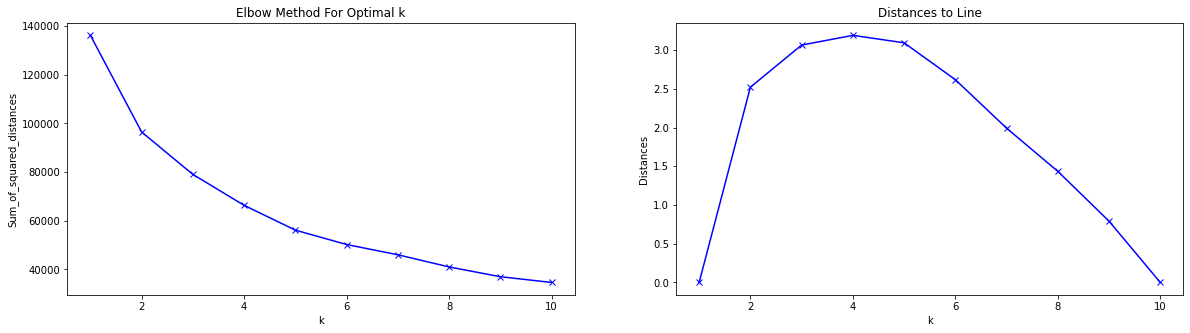

In [34]:
# cluster 
cluster_df_p_c = get_clusters(pd.DataFrame(X_scale_p),
                 df_tsne_p)

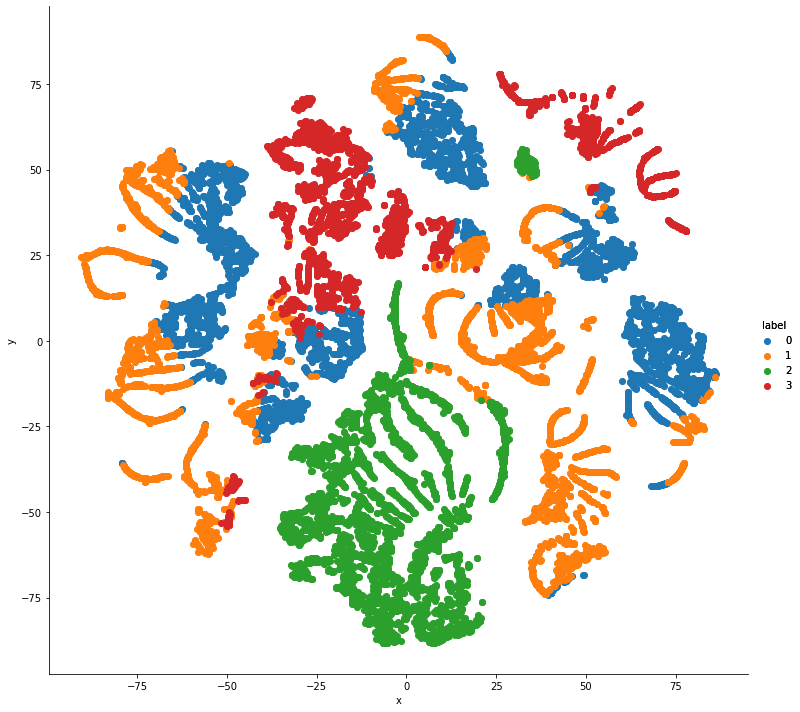

In [35]:
# illustrate
facet_p = sns.lmplot(data=cluster_df_p_c, x='x', y='y', hue='label',
                           fit_reg=False, legend=True, height=10, scatter_kws={'alpha': 0.3})

g_p = (facet_p.map(plt.scatter, 'x', 'y')
     .add_legend())

plt.show()

**Comment**

Well, here's another story already. The number of observations is much bigger, and in ovewrall the more clear cluster representation is evident. There's still a slight problem with cluster 3 cutting through the space, but given the multidimensionality of the data this is permissable as the baseline.

### Metrics evaluation and statistics

In [36]:
cluster_df_p_c['label'].value_counts()

1    5871
0    5567
2    4726
3    3300
Name: label, dtype: int64

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# current scores
(silhouette_score(X_scale_p, cluster_df_p_c['label']),
 davies_bouldin_score(X_scale_p, cluster_df_p_c['label']))

(0.2820888750280673, 1.4149648703649005)

In [38]:
# score for the previous clustering
(silhouette_score(X_scale_a, cluster_df_a['cluster_label_aut']),
 davies_bouldin_score(X_scale_a, cluster_df_a['cluster_label_aut']))

(0.31083403688473993, 1.053557357868089)

From these numbers several things can be drawn: in overall the numbers are comparable between the two clusterings, so the former explanation holds true. However, since the values worsened a bit tells us that with increasing number of observations our confidence rises, but the potential noise rises too. In our case, now the clusters are distributed much more balanced, although the biggest overlap ma take place between **cluster 1** and **cluster 2** and **cluster 0** and **cluster 3**. We'll see now what they stand for in a moment.

In [39]:
cluster_df_p['label'] = cluster_df_p_c['label']

posts_authors_stats = inverse_transform(cluster_df_p, box_lam).groupby(["Blogger's ID",'label']).mean().reset_index().drop("Blogger's ID",axis=1).groupby('label').mean().T.round(2)
posts_authors_stats



label,0,1,2,3
MEIBIX,11.81,14.16,114.00,3.25
Average Number of Words in posts (without stopwords),5.69,5.77,5.65,5.89
Number of comments,121.08,17.88,67.02,40.21
Number of retrieved inlinks,15.37,2.44,15.11,8.60
Number of retrieved comments,87.93,9.46,52.72,25.87
Frequency,285.19,380.07,4903.00,55.06


In [40]:
posts_authors_stats[[0,1]].apply(lambda x:np.round((x[0] - x[1])/x[1],2), axis=1).to_frame()

,0
MEIBIX,-0.17
Average Number of Words in posts (without stopwords),-0.01
Number of comments,5.77
Number of retrieved inlinks,5.30
Number of retrieved comments,8.29
Frequency,-0.25


So, let's see what we have here. Essentially **cluster 2** shows the more extreme values. These are bloggers who are most impactful and most frequent, with average comments though and high retrieved inlinks. Followed by **cluster 1** and **cluster 0**, who have are quite impactful, but express interesting peculiarities: cluster 1 is 25% more frequently posts, 14% more impactful, yet much much less involving into comments and links retrival (between 5 and 8 times on average). These people should be very efficient at how they approach the audience.

**cluster 3** has a low impact and low frequency, with other metrics being on pair with other clusters. It seems they have problems with how they approach the audience. 

But I think since the same author may write for different topics, or even express a varying behavior, thus belongling to the different clusters at the same time (since here we analysed the articles first of all, not directly bloggers). Okay we groupped by bloggers, but this element of uncertainty as to the belongance of one bloger to only one cluster, remains unresolved. 

In [41]:
cluster_df_p_c.shape

(19464, 10)

In [42]:
from itertools import groupby

# get the most frequent cluster per each author
cluster_authors = merged_df.copy()
cluster_authors['label'] = cluster_df_p_c['label']
cluster_authors = cluster_authors.groupby('Author ID').agg(list)['label'].apply(lambda x: {value: len(list(freq)) for value, freq in groupby(sorted(x))})\
                                                .apply(lambda x: sorted(x.items(), key=lambda kv: kv[1],reverse=True)[0][0]).to_frame().reset_index()

cluster_authors.head()

,Author ID,label
0,1,0
1,2,2
2,3,1
3,4,0
4,5,0


In [43]:
# cluster distribution in terms of the authors; as seen we have two outliers - highlt underrepresented clusters.
cluster_authors.label.value_counts()

3    58
0    32
1    16
2     1
Name: label, dtype: int64

In [44]:
posts_authors_stats

label,0,1,2,3
MEIBIX,11.81,14.16,114.00,3.25
Average Number of Words in posts (without stopwords),5.69,5.77,5.65,5.89
Number of comments,121.08,17.88,67.02,40.21
Number of retrieved inlinks,15.37,2.44,15.11,8.60
Number of retrieved comments,87.93,9.46,52.72,25.87
Frequency,285.19,380.07,4903.00,55.06


In [45]:
# inverse transform
# merge with frequency df to see the mean values per feature in terms of the clusters.


merged_df_p = inverse_transform(merged_df_trans, box_lam).merge(cluster_authors, on='Author ID').drop(['Title'], axis=1)\
                        .merge(freq_df, left_on = "Author ID", right_on="Blogger's ID").drop("Blogger's ID",axis=1)
cluster_df_p_stats = merged_df_p.groupby(['Author ID','label']).mean().reset_index().drop('Author ID',axis=1).groupby('label').mean().T.round(2)
cluster_df_p_stats


label,0,1,2,3
MEIBIX,10.38,9.69,114.00,2.93
Average Number of Words in posts (without stopwords),5.58,5.98,5.65,5.91
Number of comments,74.82,32.52,64.69,46.97
Number of retrieved inlinks,8.94,3.17,14.62,9.69
Number of retrieved comments,56.99,12.92,50.88,32.25
Frequency,160.81,375.31,4903.00,58.79


In [46]:
# inquire about the difference between clusters 0 and 1
cluster_df_p_stats[[0,1]].apply(lambda x:np.round((x[0] - x[1])/x[1],2), axis=1).to_frame()

,0
MEIBIX,0.07
Average Number of Words in posts (without stopwords),-0.07
Number of comments,1.30
Number of retrieved inlinks,1.82
Number of retrieved comments,3.41
Frequency,-0.57


In [47]:
# relative changes after focusing on one cluster per blogger.
one_blogger_cluster_change = np.round((cluster_df_p_stats - posts_authors_stats) / posts_authors_stats,2)
one_blogger_cluster_change

label,0,1,2,3
MEIBIX,-0.12,-0.32,0.00,-0.10
Average Number of Words in posts (without stopwords),-0.02,0.04,0.00,0.00
Number of comments,-0.38,0.82,-0.03,0.17
Number of retrieved inlinks,-0.42,0.30,-0.03,0.13
Number of retrieved comments,-0.35,0.37,-0.03,0.25
Frequency,-0.44,-0.01,0.00,0.07


### Sub-section conclusion

So, after segregating we were able to assign to each blogger only one most frequent cluster. The results are surprising enough.

1. It seems we have only 1 author with the striking performance in **cluster 2**. A true performer and the Master Jeddi! Didn't suffer from segregation.
2. Comparing the two statistics we can state that the majority of bloggers beling to **cluster 3** and **cluster 0**.
3. In this respect **cluster 3** is especially interesting case, since these're worst performing bloggers. Thus limiting the choice to one cluster only further degraded their performance. **cluster 1** is just an average performance, and these bloggers are quite many too. They lost about 32% in impact, but gain between 30% and 80% in comments and inlinks.
4. **cluster 0** is above average performance. They lost between 35% and 42% of comments and inlinks, and by 44% in frequency. This means they indeed expressed the varying behavior and thus had articles belonging to different clusters.
5. After segregaion, we see that **cluster 0** is impacting only slightly better (by 7%), but commenting by between 1.3 and 3.4 times more, while being 57% less frequent to write posts. 
6. In general, limiting the bloggers to one cluster only degraded the impact slightly, but still preserved the set above trend.

However, the biggest drawback and limitation of the two current approaches is the lack of insights of from the topic orientation of the bloggers. In order to find out which topics the authors mostly specialize in, topic categorization using the NLP instruments will be performed below.



# NLP topic modelling

## Data selection

In [48]:
from langdetect import detect


In [49]:
words_df = posts_df[["Blogger's ID",'Title']].copy()
words_df.head()

,Blogger's ID,Title
0,1,We Just Tested Twitter&#8217;s @anywhere Platf...
1,1,Facebook To Launch &#8216;Relationships&#8217;...
2,2,NYTimes Request Correction/Removal Of Our Post...
3,3,Google Shows How HTML5 Can Run Quake In The Br...
4,4,The iPad: Apple&#8217;s Trojan Horse


In [50]:
def detect_lang(s):
    try:
        res = detect(s)
    except:
        res = 'UNK'
    return res

In [51]:
words_df['lang'] = words_df['Title'].apply(detect_lang)

In [52]:
words_df['lang'].value_counts()

en     18240
de       430
fr       155
nl        96
af        86
ca        59
da        59
it        51
et        40
tl        35
ro        33
no        33
es        24
so        20
id        20
pt        16
sv        16
UNK        6
pl         6
sl         6
hr         6
fi         6
cy         5
sw         5
tr         3
hu         2
sk         2
lt         2
lv         1
sq         1
Name: lang, dtype: int64

In [53]:
# select English articles only
words_df = words_df.loc[words_df.lang=='en']

## Tokenization

In [54]:
from nltk.tokenize import sent_tokenize

In [55]:
words_df['sentences'] = words_df['Title'].apply(sent_tokenize)
words_df['sentences'].head(1).tolist()[0][:5] # Print the first 5 sentences of the 1st article

['We Just Tested Twitter&#8217;s @anywhere Platform (Screenshots)']

In [56]:
from nltk.tokenize import word_tokenize

In [57]:
words_df['tokens_sentences'] = words_df['sentences'].map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(words_df['tokens_sentences'].head(1).tolist()[0][:5])

[['We', 'Just', 'Tested', 'Twitter', '&', '#', '8217', ';', 's', '@', 'anywhere', 'Platform', '(', 'Screenshots', ')']]


In [58]:
from nltk import pos_tag

words_df['POS_tokens'] = words_df['tokens_sentences'].apply(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(words_df['POS_tokens'].head(1).tolist()[0][:5])

[[('We', 'PRP'), ('Just', 'RB'), ('Tested', 'VBD'), ('Twitter', 'NNP'), ('&', 'CC'), ('#', '#'), ('8217', 'CD'), (';', ':'), ('s', 'CC'), ('@', 'VB'), ('anywhere', 'RB'), ('Platform', 'NNP'), ('(', '('), ('Screenshots', 'NNP'), (')', ')')]]


In [59]:

# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [60]:
# Lemmatizing each word with its POS tag, in each sentence
words_df['tokens_sentences_lemmatized'] = words_df['POS_tokens'].apply(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [61]:
words_df['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['We',
  'Just',
  'Tested',
  'Twitter',
  '&',
  '#',
  '8217',
  ';',
  's',
  '@',
  'anywhere',
  'Platform',
  '(',
  'Screenshots',
  ')']]

In [62]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [63]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [64]:
words_df['tokens'] = words_df['tokens_sentences_lemmatized'].apply(lambda sentences: list(chain.from_iterable(sentences)))
words_df['tokens'] = words_df['tokens'].apply(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [65]:
words_df['tokens'].head(1).tolist()[0][:30]

['tested', 'twitter', 'anywhere', 'platform', 'screenshots']

## LDA

In [66]:
from gensim.models import Phrases

In [67]:
tokens = words_df['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [68]:
from gensim import corpora

In [69]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [70]:
from gensim import models

In [71]:
np.random.seed(0)
num_topics = 4
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=20, alpha='auto', eta='auto', )

CPU times: user 34.9 s, sys: 94.7 ms, total: 35 s
Wall time: 35.2 s


In [72]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.035*"google" + 0.034*"profile" + 0.020*"new" + 0.020*"facebook" + 0.019*"launches" + 0.014*"twitter" + 0.014*"search" + 0.013*"iphone" + 0.013*"video" + 0.011*"microsoft" + 0.008*"update" + 0.008*"myspace" + 0.008*"launch" + 0.008*"youtube" + 0.007*"apple" + 0.007*"online" + 0.007*"mobile" + 0.006*"live" + 0.006*"free" + 0.006*"gets"

1: 0.014*"adds" + 0.008*"data" + 0.007*"content" + 0.007*"pandora" + 0.006*"social_networking" + 0.006*"acquired" + 0.005*"right" + 0.005*"real" + 0.005*"crunchgear" + 0.005*"watch" + 0.005*"party" + 0.005*"turns" + 0.005*"public" + 0.005*"google_reader" + 0.005*"feedburner" + 0.005*"team" + 0.004*"show" + 0.004*"three" + 0.004*"marketing" + 0.004*"information"

2: 0.049*"quot" + 0.037*"yahoo" + 0.030*"web" + 0.015*"amp" + 0.011*"site" + 0.010*"raises_million" + 0.009*"aol" + 0.009*"digg" + 0.007*"acquires" + 0.006*"people" + 0.006*"back" + 0.005*"business" + 0.005*"flickr" + 0.005*"says" + 0.005*"next" + 0.005*"ceo" + 0.004*"wikipedia" + 0.004*"worl

In [73]:
# perplexity is a measure of uncertainity
print('Perplexity: ', lda_model.log_perplexity(corpus))

Perplexity:  -8.206543587874435


In [74]:
%matplotlib inline
try:
    import pyLDAvis
    import pyLDAvis.gensim
except:
    !pip install pyLDAvis
    import pyLDAvis
    import pyLDAvis.genism
import matplotlib.pyplot as plt

In [75]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA, n_jobs=1)

pyLDAvis.display(vis)

**Comment**

It seems that all articles are from high-tech industry, therefore despite some discrepancies the keywords in all of them highly interplap. This is not quite good since we might not be able to extract meaningful semantic patterns. But to make sure, we'll continue and assign the allocated topics to articles and to authors. At least so for the ENG content.

## Allocating topics to article titles

In [76]:
def predict_topic(document, lda_model,num_topics, dictionary):
    tokens = word_tokenize(document)
    res = [(el[0], round(el[1],2)) for el in lda_model[dictionary.doc2bow(tokens)]]
    return sorted(res,key=lambda x:x[1],reverse=True)



In [77]:
words_df['Title'].values[22]

'GeeknRolla To Launch Startups, London, April 20'

In [78]:
predict_topic(words_df['Title'].values[22],
              lda_model, 10, dictionary_LDA)

[(0, 0.46), (2, 0.2), (3, 0.19), (1, 0.15)]

In [79]:
topics_df = words_df.loc[:,'Title'].apply(lambda x: predict_topic(x,lda_model, 10, dictionary_LDA)[0] ).apply(pd.Series)
topics_df.columns = ['topic','weight']
topics_df['topic'] = topics_df['topic'].astype(int)
topics_df.head()

,topic,weight
0,0,0.41
1,0,0.46
2,0,0.46
3,0,0.46
4,0,0.46


In [80]:
words_df_new = pd.concat([words_df,topics_df],axis=1)
words_df_new.head()

,Blogger's ID,Title,lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,topic,weight
0,1,We Just Tested Twitter&#8217;s @anywhere Platf...,en,[We Just Tested Twitter&#8217;s @anywhere Plat...,"[[We, Just, Tested, Twitter, &, #, 8217, ;, s,...","[[(We, PRP), (Just, RB), (Tested, VBD), (Twitt...","[[We, Just, Tested, Twitter, &, #, 8217, ;, s,...","[tested, twitter, anywhere, platform, screensh...",0,0.41
1,1,Facebook To Launch &#8216;Relationships&#8217;...,en,[Facebook To Launch &#8216;Relationships&#8217...,"[[Facebook, To, Launch, &, #, 8216, ;, Relatio...","[[(Facebook, NN), (To, TO), (Launch, NNP), (&,...","[[Facebook, To, Launch, &, #, 8216, ;, Relatio...","[facebook, launch, relationships, teams, zynga...",0,0.46
2,2,NYTimes Request Correction/Removal Of Our Post...,en,[NYTimes Request Correction/Removal Of Our Pos...,"[[NYTimes, Request, Correction/Removal, Of, Ou...","[[(NYTimes, RB), (Request, NNP), (Correction/R...","[[NYTimes, Request, Correction/Removal, Of, Ou...","[nytimes, request, post, decline]",0,0.46
3,3,Google Shows How HTML5 Can Run Quake In The Br...,en,[Google Shows How HTML5 Can Run Quake In The B...,"[[Google, Shows, How, HTML5, Can, Run, Quake, ...","[[(Google, NN), (Shows, NNP), (How, NNP), (HTM...","[[Google, Shows, How, HTML5, Can, Run, Quake, ...","[google, shows, run, quake, browser]",0,0.46
4,4,The iPad: Apple&#8217;s Trojan Horse,en,[The iPad: Apple&#8217;s Trojan Horse],"[[The, iPad, :, Apple, &, #, 8217, ;, s, Troja...","[[(The, DT), (iPad, NN), (:, :), (Apple, NNP),...","[[The, iPad, :, Apple, &, #, 8217, ;, s, Troja...","[ipad, apple, trojan, horse]",0,0.46


In [81]:
authors_topics = words_df_new[["Blogger's ID","topic"]].copy()
authors_topics = authors_topics.groupby("Blogger's ID").agg(list)["topic"].apply(lambda x: {value: len(list(freq)) for value, freq in groupby(sorted(x))})\
                                                .apply(lambda x: sorted(x.items(), key=lambda kv: kv[1],reverse=True)[0][0]).to_frame().reset_index()

authors_topics.head()


,Blogger's ID,topic
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [82]:
authors_topics['topic'].value_counts()

0    105
3      1
Name: topic, dtype: int64

**Comment**

Not insightful at all - all but one authors mostly wrote for topic 0. Which just supports the formerly introduced idea. Well, because this is a research Notebook, it was worth a try, but in production this would not likely to hold.

# Task conclusions

Segmentation is an important tool of identifying the distinguishing charachteristics of the segment groups in question. Within the framework of this bloggers segmentation task I tried several approaches, namely: 

a) clustering authors directly while averaging all data from posts_df, so that additional information is at our disposal. The approach is surely working and deserves the right to live. 
b) clustering articles and assigning the most likely cluster to each author, adding here the frequency of posting per author.
c) extracting semantic annotation of the likely topic specialization per author.

Let's compare side by side the first two approaches:

In [83]:
cluster_df_a['cluster_label_aut'].value_counts()

2    58
1    30
0    13
3     6
Name: cluster_label_aut, dtype: int64

In [84]:
cluster_df_a_stats

cluster_label_aut,0,1,2,3
MEIBIX,3.69,1.63,5.55,58.67
Average Number of Words in posts (without stopwords),5.78,6.03,5.73,5.74
Number of comments,101.75,13.91,39.09,37.51
Number of retrieved inlinks,25.58,1.69,4.37,6.04
Number of retrieved comments,74.98,5.50,28.40,31.50


In [85]:
cluster_authors.label.value_counts()

3    58
0    32
1    16
2     1
Name: label, dtype: int64

In [86]:
cluster_df_p_stats

label,0,1,2,3
MEIBIX,10.38,9.69,114.00,2.93
Average Number of Words in posts (without stopwords),5.58,5.98,5.65,5.91
Number of comments,74.82,32.52,64.69,46.97
Number of retrieved inlinks,8.94,3.17,14.62,9.69
Number of retrieved comments,56.99,12.92,50.88,32.25
Frequency,160.81,375.31,4903.00,58.79


We can observe that in the latter case, the extreme value cluster put aside, the clusters exhibit similar charachteristics, even they are named differently. Yet, the second approach has the additional parameter of frequency, which is quite illustrative, and what is more importnat, the second approach draws conclusions from a much larger dataset, thus allowing for more confidence in segmentation and deeper insights as to the nature of the blogger behavior.

The NLP topic categorization has been a step in the right direction too, I believe, yet, as practice showed, given the topics names monogamity it performed poorly. If we had the articles texts themselves, I am sure the result could have been quite different.

In overall, the clusters may experience overlapping and this might be the biggest challenge to overcome with subsequent finetuning. However, I believe the solution presented in this research notebook satisfies JBGE criterion (Just Barely Good Enough) of the Agile approach for the baseline solution stage.

**By and large, I suggest using the second clustering approach - based on article numeric features - to segment the bloggers!**
